In [16]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [17]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

In [18]:
testCSR.run()

Calculating CSR at s= 0.05
--- 36.03247404098511 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/chirp-2024-04-09T17_02_09-07_00-particles.h5
Wakes written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/chirp-2024-04-09T17_02_09-07_00-wakes.h5
Finish step 2 in 37.27069115638733 seconds
Calculating CSR at s= 0.1
Finish step 3 in 0.435960054397583 seconds
Calculating CSR at s= 0.15000000000000002
--- 35.76700472831726 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/chirp-2024-04-09T17_02_09-07_00-particles.h5
Wakes written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/chirp-2024-04-09T17_02_09-07_00-wakes.h5
Finish step 4 in 36.88675808906555 seconds
Calculating CSR at s= 0.2
Finish step 5 in 0.4250314235687256 seconds
Calculating CSR at s= 0.25
--- 36.05447840690613 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/chirp-2024-04-09T17_

## Parallel Run with MPI

In [5]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [19]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chirp-2024-04-09T17_02_09-07_00',
                             work_dir = '/sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/')

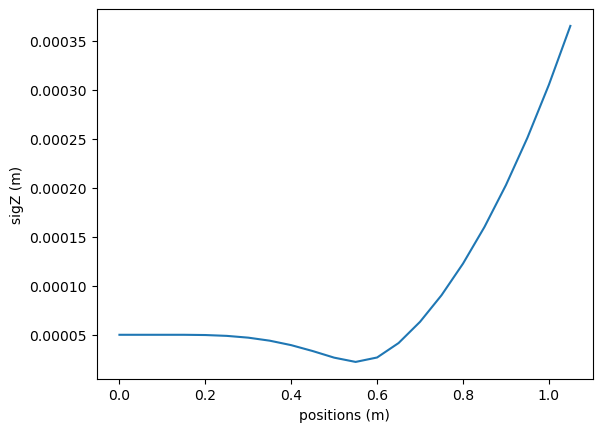

In [20]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 0.8500000000000002 m, step count 17
ebeam energy 5000000026.237229


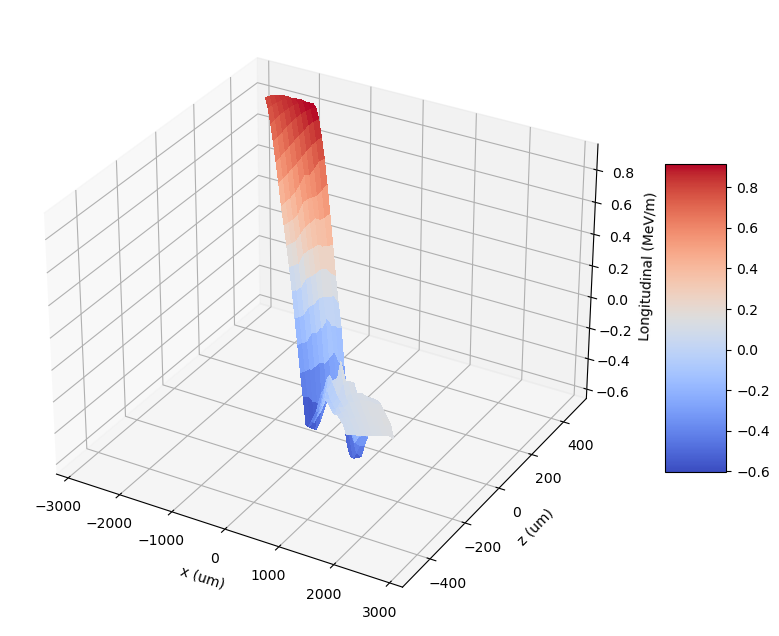

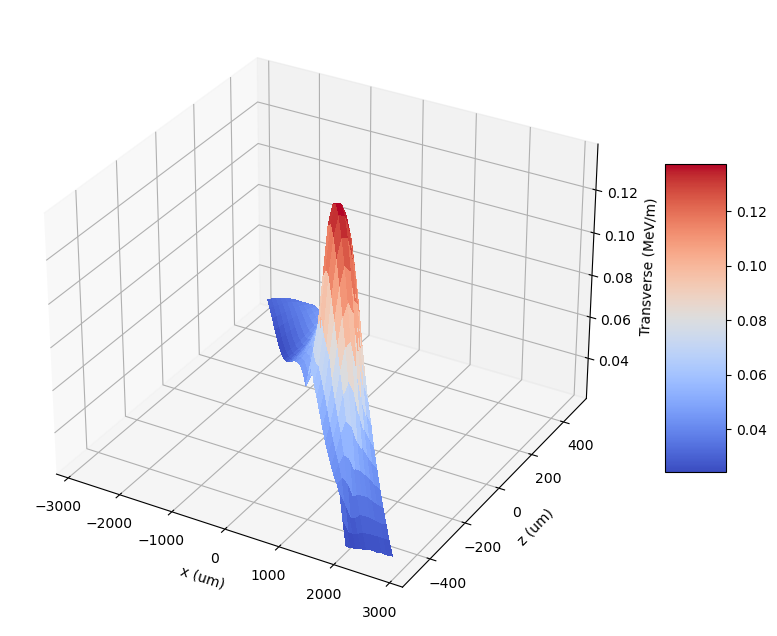

In [25]:
DFplot.plot_wakes(s = 0.9)

plot longitudinal wakes at nearest point s  = 0.6 m, step count 6


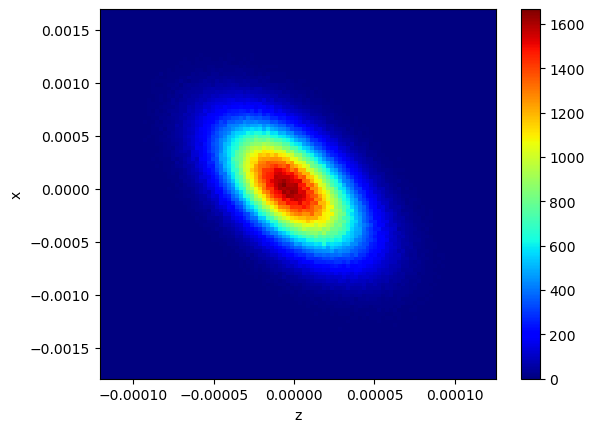

In [18]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')